In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [ ]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(10)

In [ ]:
from sklearn import preprocessing

In [ ]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [ ]:
scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [30]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [33]:
scaled_y.reshape(len(scaled_y))

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [39]:
scaled_x.shape[1] ## shape[1] is number of columns shape[0] number of rows 

2

In [40]:
np.ones(shape=(2)) 

array([1., 1.])

In [43]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [47]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1] ## shape[1] is number of columns that is our features area and badrooms
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X

    # this are to plot the graph
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w , X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

PLOT coset vs epochs


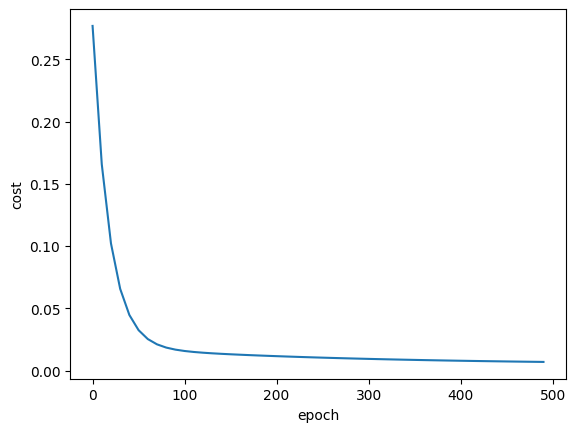

In [49]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [56]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [57]:
predict(2600,4,w,b)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [65]:
import random

In [68]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1] ## shape[1] is number of columns that is our features area and badrooms
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X

    # this are to plot the graph
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        
        
        y_predicted = np.dot(w , sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.69956779, 0.70056939]), -0.24895485933875117, 0.0033528081902787785)

In [70]:
w , b 

(array([0.70712464, 0.67456527]), -0.23034857438407427)

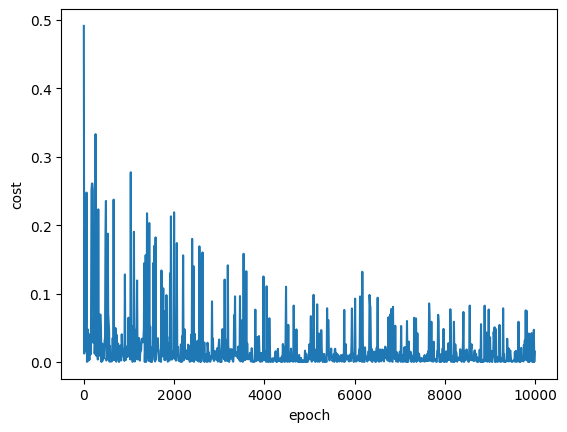

In [69]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)